In [22]:
""" Utils """
import numpy as np
import math
import matplotlib.pyplot as plt
import time
from scipy.integrate import solve_ivp #----
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation
import random
from tqdm.notebook import tqdm

In [23]:

# Define the system of ODEs
def odes(t, u):
    x1, y1, z1, y2, z2 = u
    dx1dt = sigma*(y1 - x1)
    dy1dt = rho*x1 - y1 - x1*z1
    dz1dt = -1*(beta*z1) + x1*y1
    dy2dt = rho*x1 - y2 - x1*z2
    dz2dt = -1*(beta*z2) + x1*y2
    return [dx1dt, dy1dt, dz1dt,dy2dt,dz2dt]

In [24]:
""" Initial values unchanged """
sigma = 10.0
beta = 8.0/3.0
rho = 28.0

# Initial conditions
initial_conditions = [-10.1, 10.1, 10.1, 0.1, 0.1]
t_span = [0, 80]  # Time span for integration

# Solve the system of ODEs using RK45
solution = solve_ivp(odes, t_span, initial_conditions, method='RK45', t_eval=np.linspace(0,80,8000))
t = solution.t
x_1 = solution.y[0]
y_1 = solution.y[1]
z_1 = solution.y[2]
y_2 = solution.y[3]
z_2 = solution.y[4]




<Figure size 650x650 with 0 Axes>

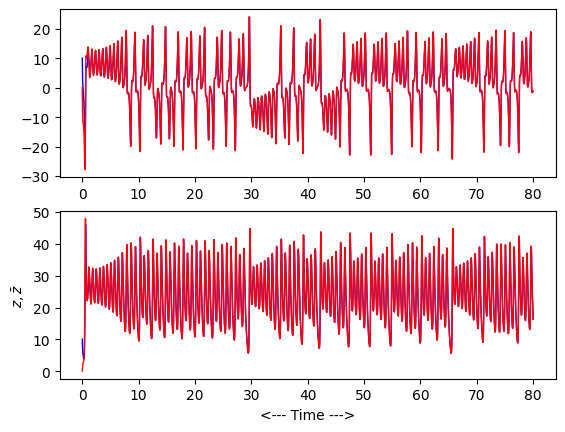

In [25]:
#-----Note systems are NOT coupled---------------------------------------
plt.figure (figsize = (6.5,6.5))

fig, axs = plt.subplots(2,1)

axs[0].plot ( t, y_1, linewidth = 1, color = 'b' )
axs[0].plot ( t, y_2, linewidth = 1, color = 'r' )
#plt.ylim(-30, 30)
plt.ylabel ( r'$y,\bar{y}$')


axs[1].plot ( t, z_1, linewidth = 1, color = 'b' )
axs[1].plot ( t, z_2, linewidth = 1, color = 'r' )
plt.xlabel ( '<--- Time --->' )
plt.ylabel ( r'$z,\bar{z}$')
#plt.ylim(0, 45)
plt.show ( )

In [26]:
Y,Z=[],[]
for y1, y2 in zip(y_1, y_2):
    Y.append(abs(y1 - y2))
for z1, z2 in zip(z_1, z_2):
    Z.append(abs(z1 - z2))


In [27]:
len(t)

8000

In [28]:
len(Z)

8000

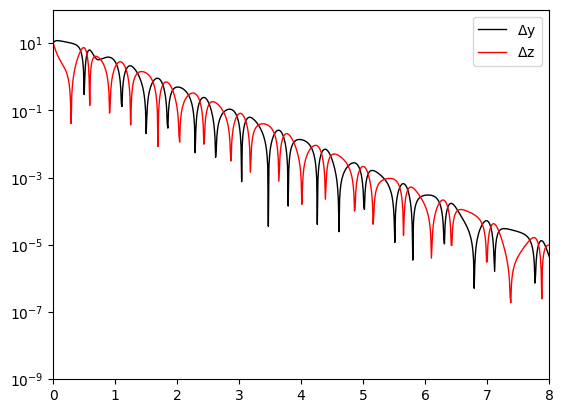

In [29]:
ax = plt.axes(yscale='log')

ax.plot ( t,Y, linewidth = 1, color = 'black', label=r'$\Delta$y')
ax.plot ( t,Z, linewidth = 1, color = 'red', label=r'$\Delta$z')
ax.set_ylim(pow(10,-9),pow(10,2))
ax.set_xlim(0,8)
ax.legend()
plt.show()

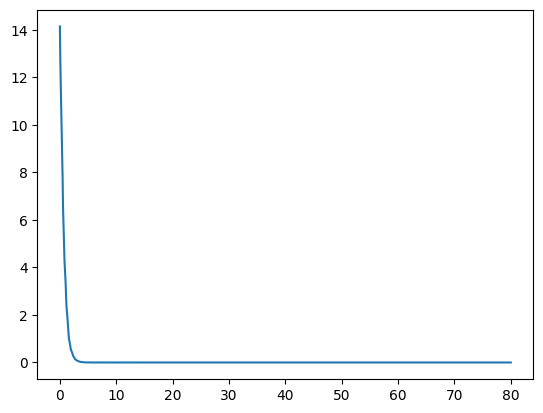

In [30]:
#Sync Error vs Time
plt.plot(t,[math.sqrt(pow(y1-y2,2)+pow(z1 - z2,2)) for x1,y1,y2,z1, z2 in zip(x_1,y_1,y_2,z_1, z_2)])